In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
avocado = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/avocado.csv')

# 시계열 데이터 분석 : 아보카도 가격 예측

In [20]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [21]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## 전처리
아보카도 가격 예측:
- 필터링: {type: conventional, region : US}
- date => DS, averagePrice -> y로 변수명 변경

In [22]:
# 아보카도 type : 종류 -> conventional만 살펴볼 예정
avocado.groupby('type').mean()

<ipython-input-22-b816a3ce30f0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avocado.groupby('type').mean()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [23]:
# type이 convetional이고 region이 TotalUS rows 169개
avocado.groupby(['type','region']).count()

Unnamed: 0  Date  AveragePrice  \
type         region                                                
conventional Albany                      169   169           169   
             Atlanta                     169   169           169   
             BaltimoreWashington         169   169           169   
             Boise                       169   169           169   
             Boston                      169   169           169   
...                                      ...   ...           ...   
organic      Syracuse                    169   169           169   
             Tampa                       169   169           169   
             TotalUS                     169   169           169   
             West                        169   169           169   
             WestTexNewMexico            166   166           166   

                                  Total Volume  4046  4225  4770  Total Bags  \
type         region                                                            
conventional Albany                        169   169   169   169         169   
             Atlanta                       169   169   169   169         169   
             BaltimoreWashington           169   169   169   169         169   
             Boise                         169   169   169   169         169   
             Boston                        169   169   169   169         169   
...                                        ...   ...   ...   ...         ...   
organic      Syracuse                      169   169   169   169         169   
             Tampa                         169   169   169   169         169   
             TotalUS                       169   169   169   169         169   
             West                          169   169   169   169         169   
             WestTexNewMexico              166   166   166   166         166   

                                  Small Bags  Large Bags  XLarge Bags  year  
type         region                                                          
conventional Albany                      169         169          169   169  
             Atlanta                     169         169          169   169  
             BaltimoreWashington         169         169          169   169  
             Boise                       169         169          169   169  
             Boston                      169         169          169   169  
...                                      ...         ...          ...   ...  
organic      Syracuse                    169         169          169   169  
             Tampa                       169         169          169   169  
             TotalUS                     169         169          169   169  
             West                        169         169          169   169  
             WestTexNewMexico            166         166          166   166  

[108 rows x 12 columns]

In [25]:
avocado = avocado[(avocado['type']=='conventional') & (avocado['region']=='TotalUS')]   # 필터링
avocado.rename(columns={'Date':'ds','AveragePrice':'y'},inplace=True)                   # 칼럼 이름 변경
avocado['ds'] = pd.to_datetime(avocado['ds'])                                           # 데이터타입 변경
avocado.reset_index(inplace=True)                                                       # 필터링을 했으니 인덱스 리셋
avocado.info()                                                                          # 반영 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         169 non-null    int64         
 1   Unnamed: 0    169 non-null    int64         
 2   ds            169 non-null    datetime64[ns]
 3   y             169 non-null    float64       
 4   Total Volume  169 non-null    float64       
 5   4046          169 non-null    float64       
 6   4225          169 non-null    float64       
 7   4770          169 non-null    float64       
 8   Total Bags    169 non-null    float64       
 9   Small Bags    169 non-null    float64       
 10  Large Bags    169 non-null    float64       
 11  XLarge Bags   169 non-null    float64       
 12  type          169 non-null    object        
 13  year          169 non-null    int64         
 14  region        169 non-null    object        
dtypes: datetime64[ns](1), float64(9), int64(

In [26]:
# 반영 확인 1: 필터링
print(avocado['type'].value_counts)
print(avocado['region'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      conventional
1      conventional
2      conventional
3      conventional
4      conventional
           ...     
164    conventional
165    conventional
166    conventional
167    conventional
168    conventional
Name: type, Length: 169, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      TotalUS
1      TotalUS
2      TotalUS
3      TotalUS
4      TotalUS
        ...   
164    TotalUS
165    TotalUS
166    TotalUS
167    TotalUS
168    TotalUS
Name: region, Length: 169, dtype: object>


In [27]:
# 반영 확인 2: 인덱스 리셋
avocado.index

RangeIndex(start=0, stop=169, step=1)

## 시각화

<Axes: xlabel='ds'>

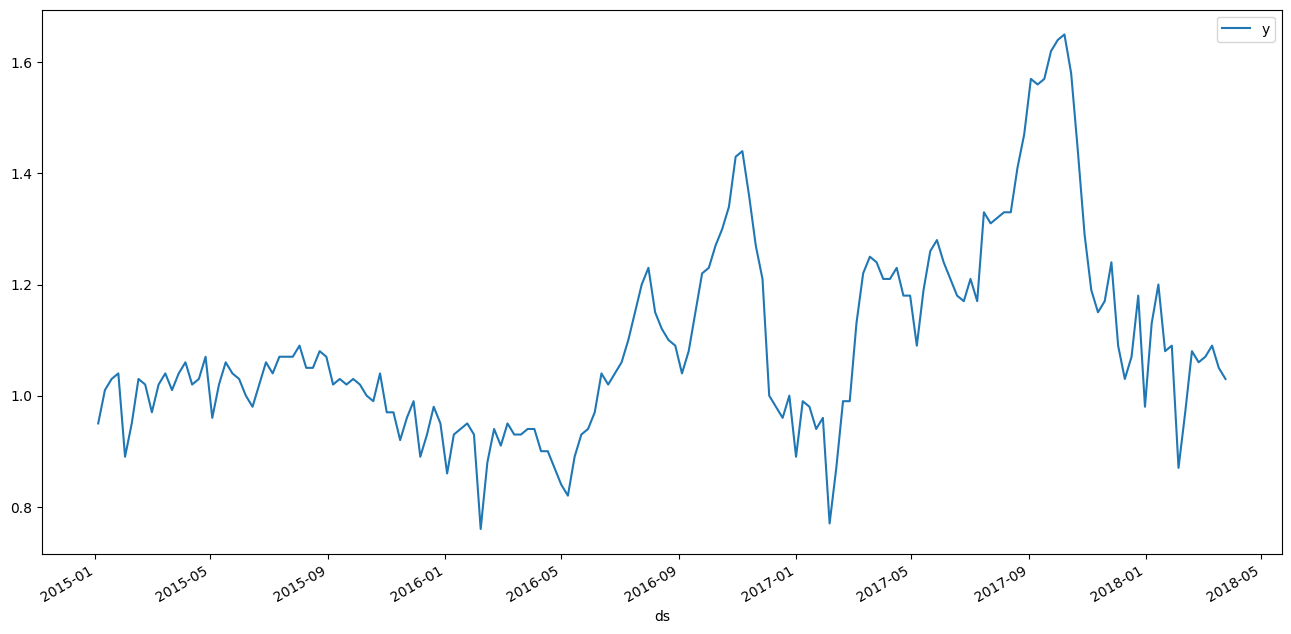

In [28]:
import matplotlib.pyplot as plt

avocado.plot(x='ds',y='y', figsize=(16,8))

In [29]:
import prophet

model = prophet.Prophet()
model.fit(avocado)
future = model.make_future_dataframe(periods=365)   # 향후 365일 동안의 가격 예측
forecast = model.predict(future)
forecast.tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx1wd1jg5/z4ogkfwi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx1wd1jg5/o6rf44o3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44555', 'data', 'file=/tmp/tmpx1wd1jg5/z4ogkfwi.json', 'init=/tmp/tmpx1wd1jg5/o6rf44o3.json', 'output', 'file=/tmp/tmpx1wd1jg5/prophet_modelbtt9sqmz/prophet_model-20231215073708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.166060,0.964013,1.238409,1.097370,1.231206,-0.061145,-0.061145,-0.061145,-0.061145,-0.061145,-0.061145,0.0,0.0,0.0,1.104915
530,2019-03-22,1.165935,0.972523,1.239357,1.096995,1.231368,-0.059755,-0.059755,-0.059755,-0.059755,-0.059755,-0.059755,0.0,0.0,0.0,1.106180
531,2019-03-23,1.165810,0.980603,1.239880,1.096621,1.231510,-0.057893,-0.057893,-0.057893,-0.057893,-0.057893,-0.057893,0.0,0.0,0.0,1.107917
532,2019-03-24,1.165685,0.975552,1.235255,1.096218,1.231586,-0.055573,-0.055573,-0.055573,-0.055573,-0.055573,-0.055573,0.0,0.0,0.0,1.110112
533,2019-03-25,1.165560,0.990689,1.245383,1.095764,1.231660,-0.052826,-0.052826,-0.052826,-0.052826,-0.052826,-0.052826,0.0,0.0,0.0,1.112734


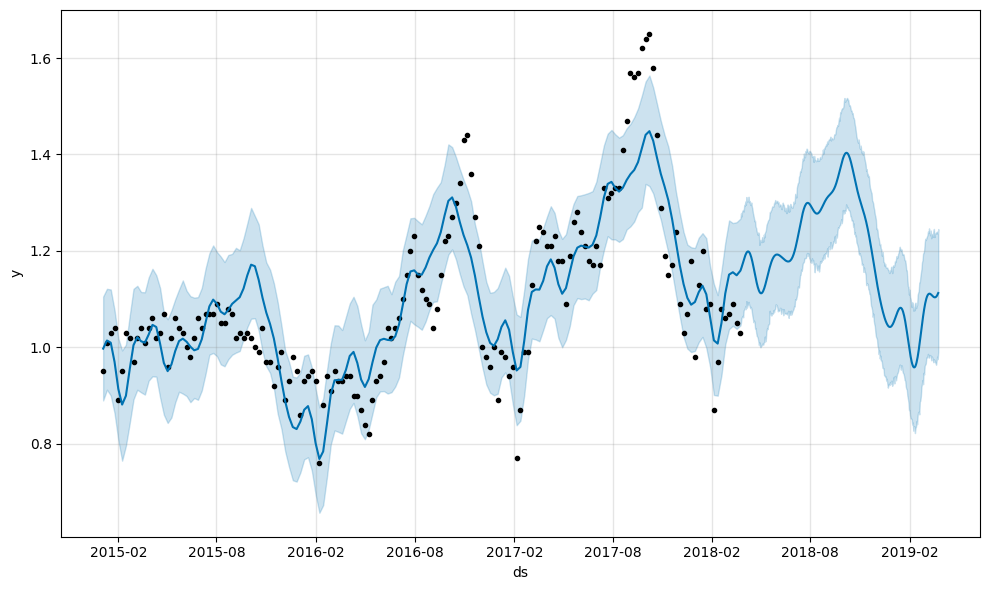

In [32]:
fig1 = model.plot(forecast)

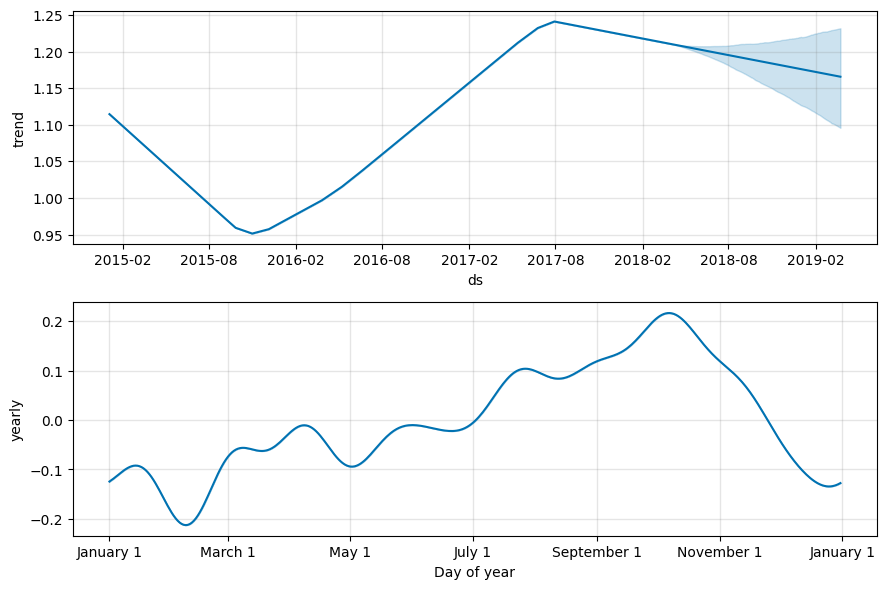

In [31]:
fig2 = model.plot_components(forecast)